In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import random 

import time # time 라이브러리 import

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


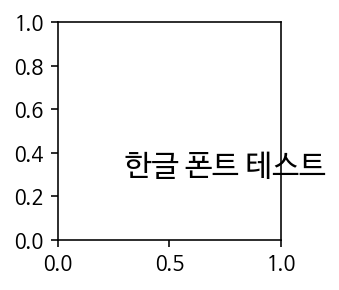

In [ ]:
## * 이 셀이 제대로 작동하지 않고 길게 warning 메시지가 나올 경우, 상단의 메뉴에서 <런타임>-<런타임 다시 시작>을 클릭한 뒤 처음부터 코드를 실행하세요 
# 그래프 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

#폰트 설치
!apt -qq -y install fonts-nanum

#기본 폰트로 지정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

from IPython.display import set_matplotlib_formats
#폰트 선명하게 보이게 하기 위해
set_matplotlib_formats('retina')

## Test
plt.figure(figsize=(2,2))
plt.text(0.3, 0.3, '한글 폰트 테스트', size=15)
plt.show() 

# 시간표 적용

In [ ]:
# Adjacent Matrix: 노드랑 선이 연결되면 1 아니면 0 
G = [
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문1 a
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문2 b
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문3 c
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_오 d
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_송1 e
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_송2 f
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #베이지안_오 g
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #표조실_차 h
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #손보_차(9) i
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #경경분_신(10) j
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #시계열_신(11) k
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],             #자분특_주(12)ㅣ
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],             #고자분_주(13)m
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],             #GLM_이(14) n
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],             #범주형_이(15) o
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],             #고통_김(16) p
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0],             #기확_김(17) q
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0],             #기확_안(18) r
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0],             #회귀_유1(19) s
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0],             #회귀_유2(20) t
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0],             #통프_안(21) u
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0],             #데마_송(22) v
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],             #계특_송(23) w
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1],             #수통_소(24) x
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],             #이통_소(25) y
     
]

In [ ]:
G = nx.Graph()
G.add_nodes_from(['통_문1','통_문2','통_문3','확통_오','확통_송1','확통_송2','베이지안_오','표조실_차','손보_차','경경분_신','시계열_신','자분특_주',
                  '고자분_주','GLM_이','범주형_이','고통_김','기확_김','기확_안','회귀_유1','회귀_유2','통프_안','데마_송','계특_송','수통_소','이통_소'])    


G.add_edges_from([('통_문1','통_문2'), ('통_문1','통_문3'), ('통_문2','통_문3'),
                  ('확통_오','베이지안_오'),('확통_송1','확통_송2'),
                  ('표조실_차','손보_차'),('경경분_신','시계열_신'),
                  ('자분특_주','고자분_주'),
                  ('GLM_이','범주형_이'),
                  ('고통_김','기확_김'),
                  ('기확_김','회귀_유1'),('기확_김','회귀_유2'),('기확_김','수통_소'),('기확_김','데마_송'),('기확_김','통프_안'),
                  ('기확_안','회귀_유1'),('기확_안','회귀_유2'),('기확_안','수통_소'),('기확_안','데마_송'),('기확_안','통프_안'),
                  ('통프_안','기확_안'),('통프_안','기확_김'),('통프_안','회귀_유1'),('통프_안','회귀_유2'),('통프_안','수통_소'),('통프_안','데마_송'),
                  ('데마_송','기확_김'),('데마_송','회귀_유1'),('데마_송','회귀_유2'),('데마_송','수통_소'),('데마_송','통프_안'),('데마_송','기확_안'),('데마_송','계특_송'),
                  ('수통_소','기확_김'),('수통_소','기확_안'),('수통_소','통프_안'),('수통_소','데마_송'),('수통_소','회귀_유1'),('수통_소','회귀_유2'),('수통_소','이통_소'),
                  ('회귀_유1','기확_김'),('회귀_유1','기확_안'),('회귀_유1','통프_안'),('회귀_유1','데마_송'),('회귀_유1','수통_소'),('회귀_유1','회귀_유2'),
                  ('회귀_유2','기확_김'),('회귀_유2','기확_안'),('회귀_유2','통프_안'),('회귀_유2','데마_송'),('회귀_유2','수통_소')])  

pos1 = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10,10))
nx.draw(G, pos1, with_labels=True,font_family='NanumBarunGothic', node_color = 'gray',node_size = 1500)  
plt.show()

In [ ]:
len(G.edges())

32

### Greedy(6개 색)

In [ ]:
start = time.time() # 시작

# initiate the name of node.
node = "abcdefghijklmnopqrstuvwxy"
t_={}
for i in range(len(G)):
  t_[node[i]] = i


# count degree of all node. 연결된 엣지 갯수
degree =[]
for i in range(len(G)):
  degree.append(sum(G[i]))

# inisiate the posible color
colorDict = {}
for i in range(len(G)):
  colorDict[node[i]]=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]


# sort the node depends on the degree. 내림차순 정렬
sortedNode=[]
indeks = []

# use selection sort
for i in range(len(degree)):
  _max = 0
  j = 0
  for j in range(len(degree)):
    if j not in indeks:
      if degree[j] > _max:
        _max = degree[j]
        idx = j
  indeks.append(idx)
  sortedNode.append(node[idx])

# The main process
theSolution={}
for n in sortedNode:
  setTheColor = colorDict[n]
  theSolution[n] = setTheColor[0]
  adjacentNode = G[t_[n]]
  for j in range(len(adjacentNode)):
    if adjacentNode[j]==1 and (setTheColor[0] in colorDict[node[j]]):
      colorDict[node[j]].remove(setTheColor[0])

# Print the solution
for t,w in sorted(theSolution.items()):
  print("Node",t," = ",w)

print(f"{time.time()-start:.4f} sec")

Node a  =  0
Node b  =  1
Node c  =  2
Node d  =  0
Node e  =  0
Node f  =  1
Node g  =  1
Node h  =  0
Node i  =  1
Node j  =  0
Node k  =  1
Node l  =  0
Node m  =  1
Node n  =  0
Node o  =  1
Node p  =  0
Node q  =  2
Node r  =  2
Node s  =  3
Node t  =  4
Node u  =  5
Node v  =  0
Node w  =  1
Node x  =  1
Node y  =  0
0.0280 sec


In [ ]:
#색칠하기

G = nx.Graph()
G.add_nodes_from(['통_문1','통_문2','통_문3','확통_오','확통_송1','확통_송2','베이지안_오','표조실_차','손보_차','경경분_신','시계열_신','자분특_주',
                  '고자분_주','GLM_이','범주형_이','고통_김','기확_김','기확_안','회귀_유1','회귀_유2','통프_안','데마_송','계특_송','수통_소','이통_소'])    


G.add_edges_from([('통_문1','통_문2'), ('통_문1','통_문3'), ('통_문2','통_문3'),
                  ('확통_오','베이지안_오'),('확통_송1','확통_송2'),
                  ('표조실_차','손보_차'),('경경분_신','시계열_신'),
                  ('자분특_주','고자분_주'),
                  ('GLM_이','범주형_이'),
                  ('고통_김','기확_김'),
                  ('기확_김','회귀_유1'),('기확_김','회귀_유2'),('기확_김','수통_소'),('기확_김','데마_송'),('기확_김','통프_안'),
                  ('기확_안','회귀_유1'),('기확_안','회귀_유2'),('기확_안','수통_소'),('기확_안','데마_송'),('기확_안','통프_안'),
                  ('통프_안','기확_안'),('통프_안','기확_김'),('통프_안','회귀_유1'),('통프_안','회귀_유2'),('통프_안','수통_소'),('통프_안','데마_송'),
                  ('데마_송','기확_김'),('데마_송','회귀_유1'),('데마_송','회귀_유2'),('데마_송','수통_소'),('데마_송','통프_안'),('데마_송','기확_안'),('데마_송','계특_송'),
                  ('수통_소','기확_김'),('수통_소','기확_안'),('수통_소','통프_안'),('수통_소','데마_송'),('수통_소','회귀_유1'),('수통_소','회귀_유2'),('수통_소','이통_소'),
                  ('회귀_유1','기확_김'),('회귀_유1','기확_안'),('회귀_유1','통프_안'),('회귀_유1','데마_송'),('회귀_유1','수통_소'),('회귀_유1','회귀_유2'),
                  ('회귀_유2','기확_김'),('회귀_유2','기확_안'),('회귀_유2','통프_안'),('회귀_유2','데마_송'),('회귀_유2','수통_소')])  

pos1 = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10,10))

color_map = ['pink','orange','yellow','pink','pink',
             'orange','orange','pink','orange','pink',
             'orange','pink','orange','pink','orange',
             'pink','yellow','yellow','green','blue',
             'purple','pink','orange','orange','pink']
nx.draw(G, pos1, with_labels=True,font_family='NanumBarunGothic', node_color = color_map ,node_size = 1500)  
plt.show()

In [ ]:
# pink 색0: [a,d,e,h,j,l,n,p,v,y]
# orange 색1: [b,f,g,i,k,m,o,w,x]
# yellow 색2: [c,q,r]
# green 색3: [s]
# blue 색4:[t]
# purple 색5:[u]


### Antcol

In [ ]:
class Ant:
    # create new ant
    # alpha: the relative importance of pheromone (si_ij)
    # beta: the relative importance of heuristic value (n_ij)
    def __init__(self, alpha=1, beta=3):
        self.graph = None
        self.colors = {}
        self.start = None
        self.visited = []
        self.unvisited = []
        self.alpha = alpha
        self.beta = beta
        self.distance = 0 # number of used colors on a valid solution
        self.number_colisions = 0 # only for consistency check, should be always 0
        self.colors_available = []
        self.colors_assigned = {}

    # reset everything for a new solution
    # start: starting node in g (random by default)
    # return: Ant
    def initialize(self, g, colors, start=None):
        self.colors_available = sorted(colors.copy())
        
        # init assigned colors with None
        keys = [n for n in g_nodes_int]
        self.colors_assigned = {key: None for key in keys}
        
        # start node
        if start is None:
            self.start = random.choice(g_nodes_int)
        else:
            self.start = start
        
        self.visited = []
        self.unvisited = g_nodes_int.copy()
        
        # assign min. color number to the start node
        if (len(self.visited)==0):
            self.assign_color(self.start, self.colors_available[0])
        return self

    # assign color to node and update the node lists
    def assign_color(self, node, color):
        self.colors_assigned[node] = color
        self.visited.append(node)
        self.unvisited.remove(node)
    
    # assign a color to each node in the graph
    def colorize(self):
        len_unvisited = len(self.unvisited)
        tabu_colors = []
        # assign color to each unvisited node
        for i in range(len_unvisited):
            next = self.next_candidate()
            tabu_colors = []
            # add colors of neighbours to tabu list
            for j in range(number_nodes):
                if (adj_matrix[next,j]==1):
                    tabu_colors.append(self.colors_assigned[j])
            # assign color with the smallest number that is not tabu
            for k in self.colors_available:
                if (k not in tabu_colors):
                    self.assign_color(next,k)
                    break
        # save distance of the current solution
        self.distance = len(set(self.colors_assigned.values()))
        # consitency check
        ##self.number_colisions = self.colisions()
        ##print('colisions: ' + str(self.number_colisions))
        
    # return the number of different colors among the neighbours of node
    def dsat(self, node=None):
        if node is None:
            node = self.start
        col_neighbors = []
        for j in range(number_nodes):
            if (adj_matrix[node, j]==1):
                col_neighbors.append(self.colors_assigned[j])
        return len(set(col_neighbors))

    # return the pheromone trail of the pair (node,adj_node)
    def si(self, node, adj_node):
        return phero_matrix[node, adj_node]

    # select next candidate node according to the transition rule
    def next_candidate(self):
        if (len(self.unvisited)==0):
           candidate = None
        elif (len(self.unvisited)==1):
            candidate = self.unvisited[0]
        else:
            max_value = 0
            heuristic_values = []
            candidates = []
            candidates_available = []
            for j in self.unvisited:
                heuristic_values.append((self.si(self.start, j)**self.alpha)*(self.dsat(j)**self.beta))
                candidates.append(j)
            max_value = max(heuristic_values)
            for i in range(len(candidates)):
                if (heuristic_values[i] >= max_value):
                   candidates_available.append(candidates[i])
            candidate = random.choice(candidates_available)
        self.start = candidate
        return candidate
    
    # return your own pheromone trail
    def pheromone_trail(self):
        phero_trail = np.zeros((number_nodes, number_nodes), float)
        for i in g_nodes_int:
            for j in g_nodes_int:
                if (self.colors_assigned[i]==self.colors_assigned[j]):
                    phero_trail[i,j] = 1
        return phero_trail

    # consistency check --> should always return 0
    def colisions(self):
        colisions = 0
        for key in self.colors_assigned:
            node = key
            col = self.colors_assigned[key]
            # check colors of neighbours
            for j in range(number_nodes):
                if (adj_matrix[node, j]==1 and self.colors_assigned[j]==col):
                    colisions = colisions+1
        return colisions
        
# take input from the txt.file and create an undirected graph
def create_graph(path):
    global number_nodes
    g = nx.Graph()
    f = open(path)
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        # convert to int
        graph_edge_list[0] = int(graph_edge_list[0])
        graph_edge_list[1] = int(graph_edge_list[1])
        # build graph
        g.add_edge(graph_edge_list[0], graph_edge_list[1])
    return g


#draw the graph and display the weights on the edges
def draw_graph(g, col_val):
	pos = nx.spring_layout(g)
	values = [col_val.get(node, 'blue') for node in g.nodes()]
	nx.draw(g, pos, with_labels = True, node_color = values, edge_color = 'black' ,width = 1, alpha = 0.7)  #with_labels=true is to show the node number in the output graph

# initiate a selection of colors for the coloring and compute the min. number of colors needed for a proper coloring
def init_colors(g):
    # grundy (max degree+1)
    colors = []
    grundy = len(nx.degree_histogram(g))
    for c in range(grundy):
       colors.append(c)
    return colors

# create a pheromone matrix with init pheromone values: 1 if nodes not adjacent, 0 if adjacent
def init_pheromones(g):
    phero_matrix = np.ones((number_nodes, number_nodes), float)
    for node in g:
        for adj_node in g.neighbors(node):
            phero_matrix[node, adj_node] = 0
    return phero_matrix

# calculate the adjacency matrix of the graph    
def adjacency_matrix(g):
    adj_matrix = np.zeros((number_nodes, number_nodes), int)
    for node in g_nodes_int:
        for adj_node in g.neighbors(node):
            adj_matrix[node, adj_node] = 1
    return adj_matrix

# create new colony
def create_colony():
    ants = []
    ants.extend([Ant().initialize(g, colors) for i in range(number_ants)])
    return ants

# apply decay rate to the phero_matrix
def apply_decay():
    for node in g_nodes_int:
        for adj_node in g_nodes_int:
            phero_matrix[node, adj_node] = phero_matrix[node, adj_node]*(1-phero_decay)


# select colony's best solution
# update pheromone_matrix according to the elite solution
# return elite solution (coloring) with its distance (number of used colors)
def update_elite():
    global phero_matrix
    # select elite
    best_dist = 0
    elite_ant = None
    for ant in ants:
        if (best_dist==0):
            best_dist = ant.distance
            elite_ant = ant
        elif (ant.distance < best_dist):
            best_dist = ant.distance
            elite_ant = ant
    # update global phero_matrix
    elite_phero_matrix = elite_ant.pheromone_trail()
    phero_matrix = phero_matrix + elite_phero_matrix
    return elite_ant.distance, elite_ant.colors_assigned


# ------------- entry point -------------
# param input_graph - a networkx graph to be colored (node coloring)
# param num_ants - number of ants in the colony
# param iter - number of iterations to be performed
# param a - relative importance of elite pheromones
# param b - relative importance of heuristic value (DSAT)
# param decay - evaporation of pheromones after each iteration
def solve(input_graph, num_ants=10, iter=10, a=1, b=3, decay=0.8):
    global g # graph to be colored (a networkx graph)
    global number_nodes
    global g_nodes_int
    global number_ants
    global alpha
    global beta
    global phero_decay
    global adj_matrix
    global phero_matrix
    global colors
    global ants
    
    # params
    g = input_graph 
    number_ants=num_ants
    number_iterations=iter
    alpha = a # relative importance of pheromone (si_ij)
    beta = b # relative importance of heuristic value (n_ij)
    phero_decay=decay # rate of pheromone decay
    
    # results
    final_solution = {} # coloring of the graph
    final_costs = 0 # number of colors in the solution
    iterations_needed = 0
    
    # init    
    number_nodes = nx.number_of_nodes(g)
    g_nodes_int = []
    for node in g.nodes():  #nodes_iter -> nodes
        g_nodes_int.append(node)
    g_nodes_int = list(map(int, sorted(g_nodes_int)))
    adj_matrix = adjacency_matrix(g)
    colors = init_colors(g)
    phero_matrix = init_pheromones(g)

    # ACO_GCP daemon
    for i in range(number_iterations):
        # create colony
        ants = []
        ants = create_colony()
        # let colony find solutions
        for ant in ants:
            ant.colorize()
        # apply decay rate
        apply_decay()
        # select elite and update si_matrix
        elite_dist, elite_sol = update_elite()
        # estimate global solution so far
        if (final_costs==0):
            final_costs = elite_dist
            final_solution = elite_sol
            iterations_needed = i+1
        elif (elite_dist<final_costs):
            final_costs = elite_dist
            final_solution = elite_sol
            iterations_needed = i+1
    return final_costs, final_solution, iterations_needed
        

# global vars
g = None # graph to be colored
number_nodes = 0
g_nodes_int = []
number_ants = 0
alpha = 0
beta = 0
phero_decay = 0
adj_matrix = np.zeros((number_nodes, number_nodes), int)
phero_matrix = np.ones((number_nodes, number_nodes), float)
colors = []
ants = []


In [ ]:
# Adjacent Matrix: 노드랑 선이 연결되면 1 아니면 0 
G_a = np.array([
    [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문1
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문2
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #통계학_문3
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_오 d
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_송1 e
    [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #확통_송2 f
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #베이지안_오
    [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #표조실_차 h
    [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #손보_차(9) i
    [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #경경분_신(10)
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],             #시계열_신(11) k
    [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],             #자분특_주(12)ㅣ
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],             #고자분_주(13)m
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],             #GLM_이(14)n
    [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],             #범주형_이(15)
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],             #고통_김(16) p
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0],             #기확_김(17) q
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0],             #기확_안(18) r
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0],             #회귀_유1(19) s
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0],             #회귀_유2(20) t
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0],             #통프_안(21) u
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0],             #데마_송(22) v
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],             #계특_송(23) w
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1],             #수통_소(24) x
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],             #이통_소(25) y
     
])

In [ ]:
#Ant cols
G1 = nx.from_numpy_array(G_a)
start = time.time() # 시작

solve(G1)
print(f"{time.time()-start:.4f} sec") 

0.3251 sec


In [ ]:
print(solve(G1))

# a: 0, 
# b: 1, 
# c: 2, 
# d: 0, 
# e: 1,
# f: 0, 
# g: 1, 
# h: 0, 
# i: 1, 
# j: 0, 
# k: 1, 
# l: 0, 
# m: 1, 
# n: 0, 
# o: 1, 
# p: 0, 
# q: 1, 
# r: 1, 
# s: 5, 
# t: 2, 
# u: 4, 
# v: 0, 
# w: 1, 
# x: 3, 
# y: 0

(6, {0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1, 9: 0, 10: 1, 11: 0, 12: 1, 13: 0, 14: 1, 15: 0, 16: 1, 17: 1, 18: 5, 19: 2, 20: 4, 21: 0, 22: 1, 23: 3, 24: 0}, 1)


In [ ]:
#색칠하기

G = nx.Graph()
G.add_nodes_from(['통_문1','통_문2','통_문3','확통_오','확통_송1','확통_송2','베이지안_오','표조실_차','손보_차','경경분_신','시계열_신','자분특_주',
                  '고자분_주','GLM_이','범주형_이','고통_김','기확_김','기확_안','회귀_유1','회귀_유2','통프_안','데마_송','계특_송','수통_소','이통_소'])    


G.add_edges_from([('통_문1','통_문2'), ('통_문1','통_문3'), ('통_문2','통_문3'),
                  ('확통_오','베이지안_오'),('확통_송1','확통_송2'),
                  ('표조실_차','손보_차'),('경경분_신','시계열_신'),
                  ('자분특_주','고자분_주'),
                  ('GLM_이','범주형_이'),
                  ('고통_김','기확_김'),
                  ('기확_김','회귀_유1'),('기확_김','회귀_유2'),('기확_김','수통_소'),('기확_김','데마_송'),('기확_김','통프_안'),
                  ('기확_안','회귀_유1'),('기확_안','회귀_유2'),('기확_안','수통_소'),('기확_안','데마_송'),('기확_안','통프_안'),
                  ('통프_안','기확_안'),('통프_안','기확_김'),('통프_안','회귀_유1'),('통프_안','회귀_유2'),('통프_안','수통_소'),('통프_안','데마_송'),
                  ('데마_송','기확_김'),('데마_송','회귀_유1'),('데마_송','회귀_유2'),('데마_송','수통_소'),('데마_송','통프_안'),('데마_송','기확_안'),('데마_송','계특_송'),
                  ('수통_소','기확_김'),('수통_소','기확_안'),('수통_소','통프_안'),('수통_소','데마_송'),('수통_소','회귀_유1'),('수통_소','회귀_유2'),('수통_소','이통_소'),
                  ('회귀_유1','기확_김'),('회귀_유1','기확_안'),('회귀_유1','통프_안'),('회귀_유1','데마_송'),('회귀_유1','수통_소'),('회귀_유1','회귀_유2'),
                  ('회귀_유2','기확_김'),('회귀_유2','기확_안'),('회귀_유2','통프_안'),('회귀_유2','데마_송'),('회귀_유2','수통_소')])  

pos1 = nx.kamada_kawai_layout(G)
plt.figure(figsize=(10,10))

color_map = ['pink','orange','yellow','pink','orange',
             'pink','orange','pink','orange','pink',
             'orange','pink','orange','pink','orange',
             'pink','orange','orange','purple','yellow',
             'blue','pink','orange','green','pink']

nx.draw(G, pos1, with_labels=True,font_family='NanumBarunGothic', node_color = color_map ,node_size = 1500)  
plt.show()

In [ ]:
# pink 색0: [a,d,f,h,j,l,n,p,v,y]
# orange 색1: [b,e,g,i,k,m,o,q,r,w]
# yellow 색2: [c,t]
# green 색3: [x]
# blue 색4:[u]
# purple 5:[s]


### tabucol (6개 색)

In [ ]:
from collections import deque
from random import randrange

def tabucol(graph, number_of_colors, tabu_size=7, reps=100, max_iterations=10000, debug=False):
    # graph is assumed to be the adjacency matrix of an undirected graph with no self-loops
    # nodes are represented with indices, [0, 1, ..., n-1]
    # colors are represented by numbers, [0, 1, ..., k-1]
    colors = list(range(number_of_colors))
    # number of iterations of the tabucol algorithm
    iterations = 0
    # initialize tabu as empty queue
    tabu = deque()
    
    # solution is a map of nodes to colors
    # Generate a random solution:
    solution = dict()
    for i in range(len(graph)):
        solution[i] = colors[randrange(0, len(colors))]

    # Aspiration level A(z), represented by a mapping: f(s) -> best f(s') seen so far
    aspiration_level = dict()

    while iterations < max_iterations:
        # Count node pairs (i,j) which are adjacent and have the same color.
        move_candidates = set()  # use a set to avoid duplicates
        conflict_count = 0
        for i in range(len(graph)):
            for j in range(i+1, len(graph)):  # assume undirected graph, ignoring self-loops
                if graph[i][j] > 0: # adjacent
                    if solution[i] == solution[j]:  # same color
                        move_candidates.add(i)
                        move_candidates.add(j)
                        conflict_count += 1
        move_candidates = list(move_candidates)  # convert to list for array indexing

        if conflict_count == 0:
            # Found a valid coloring.
            break

        # Generate neighbor solutions.
        new_solution = None
        for r in range(reps):
            # Choose a node to move.
            node = move_candidates[randrange(0, len(move_candidates))]
            
            # Choose color other than current.
            new_color = colors[randrange(0, len(colors) - 1)]
            if solution[node] == new_color:
                # essentially swapping last color with current color for this calculation
                new_color = colors[-1]

            # Create a neighbor solution
            new_solution = solution.copy()
            new_solution[node] = new_color
            # Count adjacent pairs with the same color in the new solution.
            new_conflicts = 0
            for i in range(len(graph)):
                for j in range(i+1, len(graph)):
                    if graph[i][j] > 0 and new_solution[i] == new_solution[j]:
                        new_conflicts += 1
            if new_conflicts < conflict_count:  # found an improved solution
                # if f(s') <= A(f(s)) [where A(z) defaults to z - 1]
                if new_conflicts <= aspiration_level.setdefault(conflict_count, conflict_count - 1):
                    # set A(f(s) = f(s') - 1
                    aspiration_level[conflict_count] = new_conflicts - 1

                    if (node, new_color) in tabu: # permit tabu move if it is better any prior
                        tabu.remove((node, new_color))
                        if debug:
                            print("tabu permitted;", conflict_count, "->", new_conflicts)
                        break
                else:
                    if (node, new_color) in tabu:
                        # tabu move isn't good enough
                        continue
                if debug:
                    print (conflict_count, "->", new_conflicts)
                break

        # At this point, either found a better solution,
        # or ran out of reps, using the last solution generated
        
        # The current node color will become tabu.
        # add to the end of the tabu queue
        tabu.append((node, solution[node]))
        if len(tabu) > tabu_size:  # queue full
            tabu.popleft()  # remove the oldest move

        # Move to next iteration of tabucol with new solution
        solution = new_solution
        iterations += 1
        if debug and iterations % 500 == 0:
            print("iteration:", iterations)
            
# At this point, either conflict_count is 0 and a coloring was found,
# or ran out of iterations with no valid coloring.
    if conflict_count != 0:
        print("No coloring found with {} colors.".format(number_of_colors))
        return None
    else:
        print("Found coloring:\n", solution)
        print("itertaions :\n", iterations)
        print("number of colors :\n", len(set(solution.values())))


In [ ]:
start = time.time()

tabucol(G, 100)
print(f"{time.time()-start:.4f} sec")

# a: 1, 
# b: 5,
# c: 4,
# d: 5,
# e: 5
# f: 3
# g: 2,
# h: 1, 
# i: 0, 
# j: 0, 
# k: 1, 
# l: 0, 
# m: 1, 
# n: 3, 
# o: 5, 
# p: 5,
# q: 1,
# r: 1,
# s: 0, 
# t: 4, 
# u: 5,
# v: 3,
# w: 1,
# x: 2,
# y: 4

In [ ]:
start = time.time()

tabucol(G, 11)
print(f"{time.time()-start:.4f} sec")

Found coloring:
 {0: 9, 1: 2, 2: 7, 3: 4, 4: 0, 5: 7, 6: 0, 7: 6, 8: 2, 9: 5, 10: 2, 11: 4, 12: 0, 13: 8, 14: 10, 15: 3, 16: 1, 17: 6, 18: 7, 19: 5, 20: 4, 21: 8, 22: 3, 23: 10, 24: 3}
itertaions :
 3
number of colors :
 11
0.0048 sec


### backtracking(7개 색)

In [ ]:
# A utility function to check
# if the current color assignment
# is safe for vertex v
def isSafe(graph, v, colour, c):
    for i in range(len(graph)):
        if graph[v][i] == 1 and colour[i] == c:
            return False
    return True

# A recursive utility function to solve m
# coloring  problem
def graphColourUtil(graph, m, colour, v):
    if v == len(graph):
        return True

    for c in range(1, m + 1):
        if isSafe(graph, v, colour, c) == True:
            colour[v] = c
            if graphColourUtil(graph, m, colour, v + 1) == True:
                return True
            colour[v] = 0


def Backtracking(graph, m):
    colour = [0] * len(graph)
    if graphColourUtil(graph, m, colour, 0) == None:
        return False

    # Print the solution
    print("Solution exist and Following are the assigned colours:")
    num=0
    for c in colour:
        print(c, end=' ')
    return True, len(set(colour))

In [ ]:
start = time.time()
print(Backtracking(G,100))
print(f"{time.time()-start:.4f} sec")

# a:1 
# b 2 
# c 3 
# d 1 
# e 1 
# f 2 
# g 2 
# h 1 
# i 2 
# j 1 
# k 2 
# l  1 
# m 2 
# n 1 
# o 2 
# p 1 
# q 2 
# r  1 
# s  3 
# t 4 
# u  5 
# v  6 
# w 1 
# x  7 
# y  1 

Solution exist and Following are the assigned colours:
1 2 3 1 1 2 2 1 2 1 2 1 2 1 2 1 2 1 3 4 5 6 1 7 1 (True, 7)
0.0168 sec
